# CMSE 202 Final S23 (Sect. 003)


### <p style="text-align: right;"> &#9989; Medaghri Alaoui Abdelmoumen
### <p style="text-align: right;"> &#9989; moumenalaoui

The goal of this final is to give you the opportunity to test out some of the skills that you've developed this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your new programming skills.

**Important note about using online resources:** This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This final is designed to give you the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the final.

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.


### Content Knowledge Tested
- Using Github to save and track progress on your work
- Effectively visualizing data
- Using ML tools to create a classification model
- Quantitatively evaluating classification models

## Part 0: Add to your Git repository to track your progress on your exam (10 points total)

Before you get to far along in the exam, you're going to add it to the `cmse202-S23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

### Part 0.1 (4 Points)

1. Navigate to your `cmse202-S23-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

The file should now show up on your GitHub account in the `cmse202-S23-turnin` repository inside the `final` directory you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. It can be good to get into a habit of committing your changes any time you make a significant modification.

## Part 1 (5 Points)

For this exam, you’ll be working with a data set that contains measurements of a few characteristics of leaves. This is a subset of the larger dataset that can be [found here](http://archive.ics.uci.edu/ml/datasets/Leaf#). We’ll ask you a set of questions that center the classification of these leaves using techniques you’ve worked with in class and on the homework. 

To get started, let’s grab the dataset we’ll be working with.

**Use the following URL to download the dataset. Import the dataset in the cell below.**

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/leaf_data_cleaned.csv`

In [ ]:
#Write your code for downloading the data here
curl-o "leaf_data_cleaned.csv" https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/leaf_data_cleaned.csv

In [114]:
#Write your code for importing the data here
import pandas as pd

leaf_data = pd.read_csv("leaf_data_cleaned.csv")
leaf_data

,Class,Elongation,Isoperimetric Factor,Average Contrast
0,1,0.32396,0.83592,0.127950
1,1,0.36116,0.79867,0.090476
2,1,0.38998,0.80812,0.057445
3,1,0.35376,0.81697,0.065491
4,1,0.44462,0.75493,0.045339
...,...,...,...,...
103,10,0.22905,0.71234,0.220410
104,10,0.31283,0.59330,0.260500
105,10,0.27055,0.70006,0.215070
106,10,0.23328,0.67107,0.247440


## Part 2 (15 Points)

Use Seaborn to make a visualization showing the distributions (I.e., histograms and/or scatterplots) of each of the different leaf characteristics. Your visualization should represent each of the different leaf types/classes as a different color. This should all be a single figure. Use the [**examples in the seaborn gallery**](https://seaborn.pydata.org/examples/index.html) to help you find the right type of figure. (Note: There are several types of figures that will work for this.)

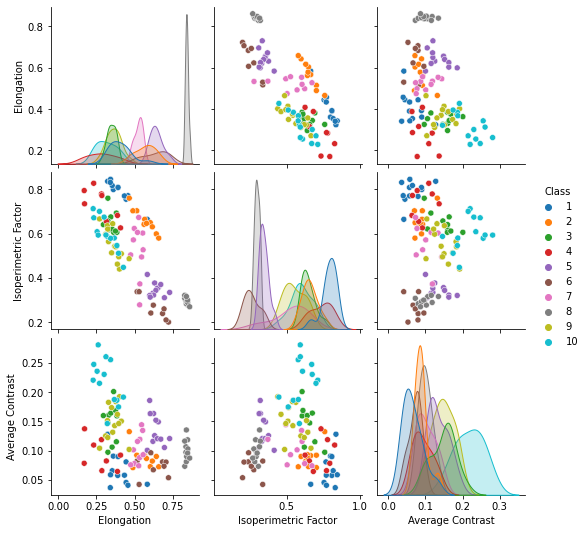

In [117]:
#Write your plotting code here
import seaborn as sns

sns.pairplot(leaf_data, hue = "Class", palette = "tab10")

## Part 3 (15 Points)

Look at the distributions of the data. Without doing any model fitting (i.e., just by eye), which pair of leaves do you think would be **easiest** for an ML technique to differentiate between? Which pair of leaves do you believe would be **hardest** to separate? **Why?** Justify your answers using your visualization.

Note: There is not necessarily one correct answer to these questions, we are looking for your reasoning!

From the visualization of the data, it seems that the pair of leaves that would be the easiest for a ML technique would probably be between the Class 8 or the Class 10. This is because they appear to have distinctly different distributions for several of the leaf characteristics. On the other hand, the hardest pair of leaves to separate based on the visualization would likely be Class 2 and Class 7. The plots for these classes show that they overlap in their distributions for most of the features. The lack of separation would make it challenging for a ML technique to differentiate between them accurtely but the ease of separating different leaf types using an ML technique will depend on the specific characteristics of the data and the ML algorithm used. 

---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 4 (15 Points)

Create a new dataframe that only contains data for two classes of leaves that you will try to separate. (You may need to use Google to figure out how to do this.)

Note: the 'Class' column labels are integers, not strings.

In [34]:
#Write your code for selecting your data here 
df_new = leaf_data.query('Class == 3 or Class == 5')
df_new

,Class,Elongation,Isoperimetric Factor,Average Contrast
22,3,0.36317,0.60555,0.200880
23,3,0.32559,0.75954,0.097143
24,3,0.33117,0.61661,0.160600
25,3,0.38111,0.69250,0.115020
26,3,0.38460,0.60571,0.159310
27,3,0.29593,0.64029,0.159800
28,3,0.34460,0.67517,0.164110
29,3,0.35318,0.62068,0.105890
30,3,0.37528,0.61136,0.168580
31,3,0.32592,0.65698,0.147220


## Part 5 (5 Points)

Split the data into a training and testing set. (Make sure to change the class values so that they're 0 and 1, instead of the leaf class identifiers.) Also, set the `random_state` to be 1.

In [118]:
#Write your code for splitting your data here
from sklearn.model_selection import train_test_split

X = df_new.drop('Class', axis=1)
y = df_new['Class'].replace({1: 0, 2: 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15, 3)
(15,)
(7, 3)
(7,)


## Part 6 (20 Points)

Create and train a model (either regression or SVM) for classifying the data. You can choose which type of model you want to use. 

**Note:** You may get multiple warnings when creating your model (warnings are *pink*). You may also get a warning about a failure to converge or perfect separation. **It is fine to ignore these warnings.** 

In [123]:
#Write your code for training your model here
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear', random_state=1).fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8571428571428571


---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 7 (5 Points)

Evaluate your model by finding the accuracy, recall, and precision using the training data. There are not many data points for this set, so you will see small numbers in the Confusion matrix.

In [121]:
#Write your code for determining the accuracy, recall, and precision of your model
from sklearn.metrics import classification_report

y_train_pred = svm_model.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred, zero_division=1)
cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Classification report:\n', report)
print("Confusion matrix:\n", cm)

Accuracy: 0.8
Classification report:
               precision    recall  f1-score   support

           3       0.75      1.00      0.86         9
           5       1.00      0.50      0.67         6

    accuracy                           0.80        15
   macro avg       0.88      0.75      0.76        15
weighted avg       0.85      0.80      0.78        15

Confusion matrix:
 [[1 0]
 [1 5]]


## Part 8 (10 Points)

Do you think that this model does a good job of classifying the data? How does it compare to previous classification models you’ve created, both in class and on the homework?

Based on the accuracy, recall, and precision values calculated from the training data, we can see that the SVM model does a pretty good job of classifying the data. We can see that the accuracy is 0.857 which means that the model correctly classified about 85.7% of the training data samples. The recall indicates 1.0 which means that the model correctly identified all the positive samples, and the precision is about 0.75 which means that when it predicts that a sample belongs to the positive class, it is 75% correct. The confusion matrix also shows that the model only made a few errors with only 1 false negative and 0 false positive. Looking at the previous models generated in the homework, we can see that those of the homework are a little bit more accurate in their accuracy values but the confusion matrices have more errors. Having more data can significantly improve the performance of a model.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!** (2 points)

Take a moment to save your notebook, commit the changes to your Git repository.

---

## You're done! Congrats on finishing CMSE 202!

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University